In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [3]:
def visualise_byprotocol(subno, protocol, space='native', hist=True):
    figure = {}
    colors = ['tab:blue','tab:orange','tab:red','tab:green']
    i=0
    for sub in subno:

        filename_prefix = '/Users/xinzhang/Downloads/mrc_asl_cic/data/sub{:02d}'.format(sub)
        ax = {}

        if protocol=='GE-3D':
            figure[i] = plt.figure(figsize=[12,3],dpi=100) 
            figure[i+1] = plt.figure(figsize=[6,3],dpi=100)
            j=0
            if hist: ax_hist = figure[i+1].add_subplot()
            for session in ['s1','s2']:
                for state in ['REST','TASK']:
                    ax[j] = figure[i].add_subplot(1,4,j+1)
                    cbf = nib.load(filename_prefix+'/ge/'+session+'/analysis/3D_'+state+'/REPEAT_ALL_CBF_mcflirt_mean_BETed.nii.gz').get_fdata()
                    mask = nib.load(filename_prefix+'/ge/'+session+'/analysis/3D_'+state+'/REPEAT_ALL_CBF_mcflirt_mean_BETed_mask.nii.gz').get_fdata()
                    ax[j].imshow(cbf[:,:,round(cbf.shape[2]/2)],cmap='Greys_r')
                    ax[j].xaxis.set_visible(False)
                    ax[j].yaxis.set_visible(False)
                    ax[j].set_title('sub{:02d}'.format(sub)+' '+protocol+'\n'+session+' '+state)
                    if hist: ax_hist.hist(cbf.flatten()[mask.flatten()>0],bins=100,histtype='step',label=session+' '+state,color=colors[j])
                    j+=1
            if hist: ax_hist.legend()
            if hist: ax_hist.grid(alpha=0.5)
            if hist: ax_hist.set_xlabel('CBF (ml/100g/min)')
            if hist: ax_hist.set_ylabel('Number of voxels')
            if hist: ax_hist.set_title('Histogram of sub{:02d}'.format(sub)+' '+protocol)

        else:
            ax_hist = {}
            if protocol=='GE-eASL':
                scanner='ge'; type='eASL'
            elif protocol=='Ing-2D':
                scanner='ing'; type='2D'
            elif protocol=='Ing-3D':
                scanner='ing'; type='3D'
            else:
                ValueError('Protocol name does not exist.')
            struct_mask = nib.load(filename_prefix+'/'+scanner+'/s1/analysis/T1.anat/T1_biascorr_brain_mask.nii.gz').get_fdata()
            std_mask = nib.load(filename_prefix+'/'+scanner+'/s1/analysis/T1.anat/MNI152_T1_2mm_brain_mask_dil1.nii.gz').get_fdata()
            figure[i] = plt.figure(figsize=[12,6],dpi=100) 
            figure[i+1] = plt.figure(figsize=[12,3],dpi=100)
            j=0
            for pvc in ['nopvc','pvc']:
                if hist: ax_hist[j//4] = figure[i+1].add_subplot(1,2,j//4+1)
                for session in ['s1','s2']:
                    for state in ['REST','TASK']:
                        ax[j] = figure[i].add_subplot(2,4,j+1)
                        if pvc=='nopvc':
                            cbf = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space+'_space/perfusion_calib.nii.gz').get_fdata()
                        if pvc=='pvc':
                            cbf = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space+'_space/pvcorr/perfusion_calib.nii.gz').get_fdata()
                        if space=='native':
                            mask = nib.load(filename_prefix+'/'+scanner+'/'+session+'/analysis/'+type+'_'+state+'/'+space+'_space/mask.nii.gz').get_fdata()
                        elif space=='struct':
                            mask = struct_mask
                        elif space=='std':
                            mask = std_mask
                        ax[j].imshow(cbf[:,:,round(cbf.shape[2]/2)],cmap='Greys_r')
                        ax[j].xaxis.set_visible(False)
                        ax[j].yaxis.set_visible(False)
                        ax[j].set_title('sub{:02d}'.format(sub)+' '+protocol+' '+pvc+'\n'+session+' '+state)
                        if hist: ax_hist[j//4].hist(cbf.flatten()[mask.flatten()>0],bins=100,histtype='step',label=session+' '+state,color=colors[j%4])
                        j+=1
                if hist: ax_hist[(j-1)//4].legend()
                if hist: ax_hist[(j-1)//4].grid(alpha=0.5)
                if hist: ax_hist[(j-1)//4].set_xlabel('CBF (ml/100g/min)')
                if hist: ax_hist[(j-1)//4].set_ylabel('Number of voxels')
                if hist: ax_hist[(j-1)//4].set_title('Histogram of sub{:02d}'.format(sub)+' '+protocol+' '+pvc)
                
        i+=2

    return None

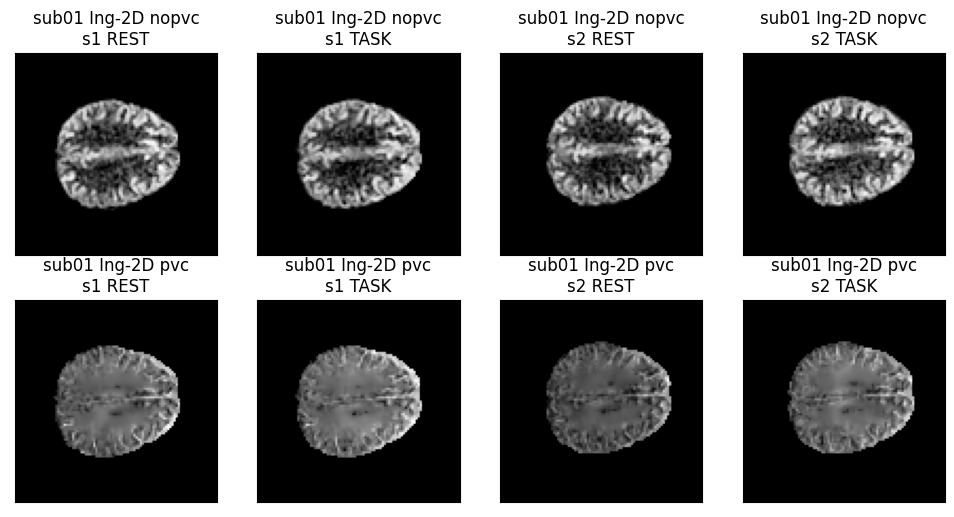

<Figure size 1200x300 with 0 Axes>

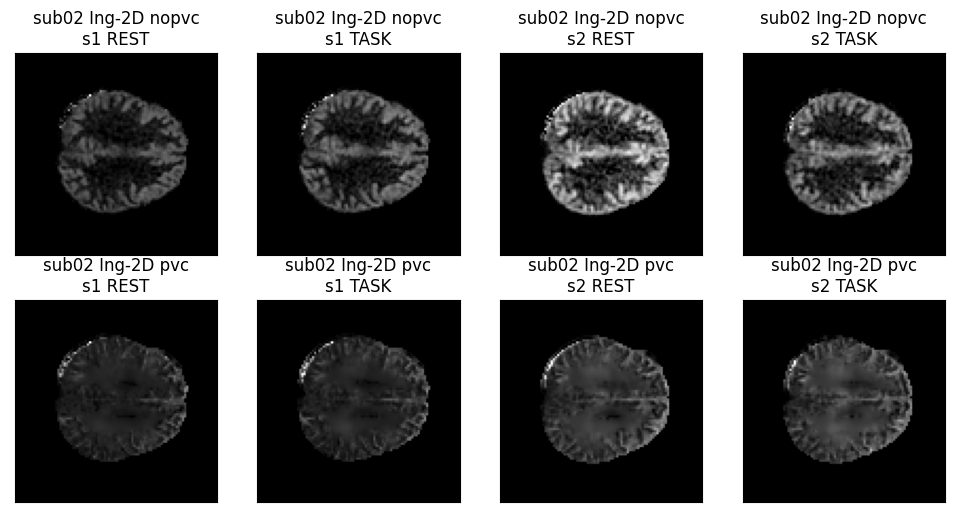

<Figure size 1200x300 with 0 Axes>

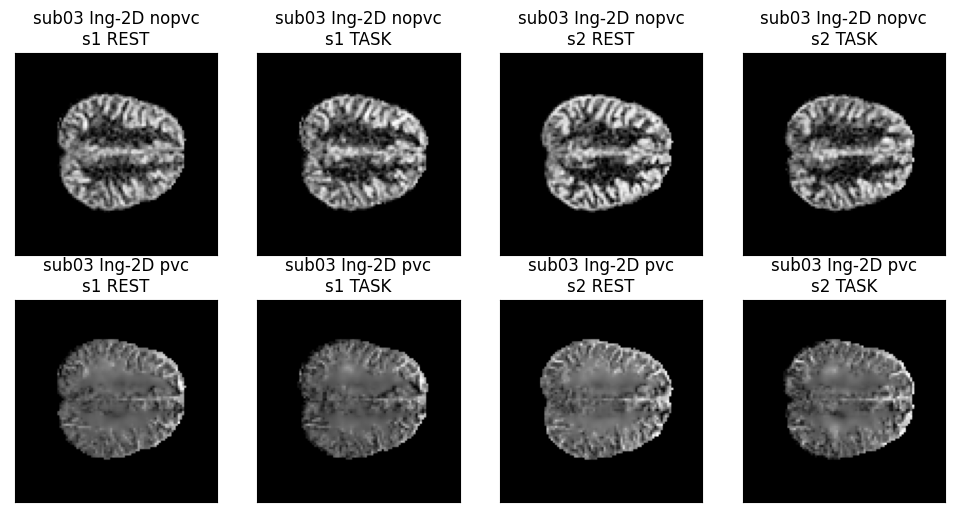

<Figure size 1200x300 with 0 Axes>

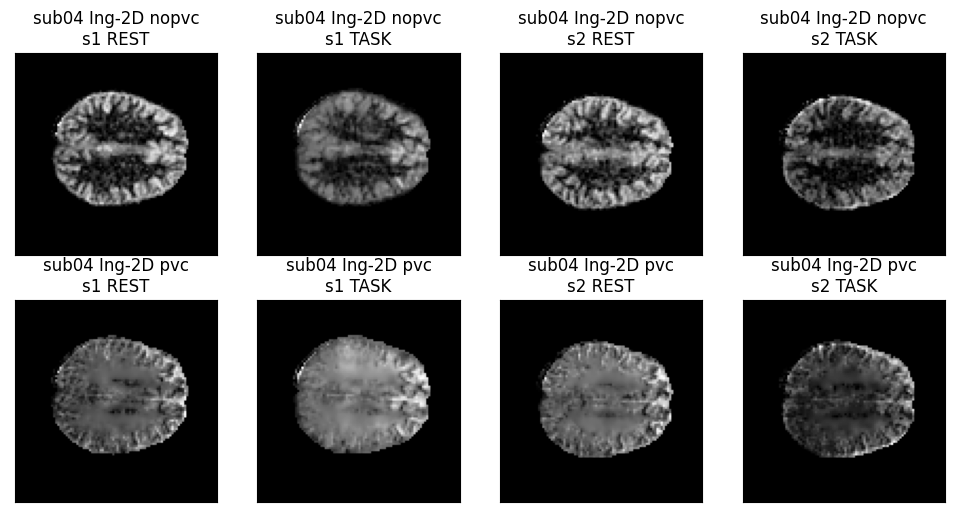

<Figure size 1200x300 with 0 Axes>

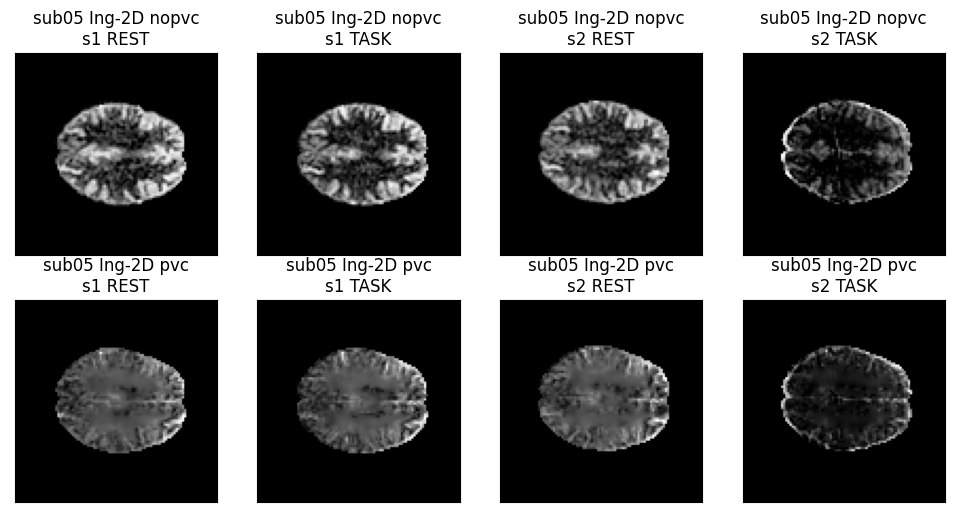

<Figure size 1200x300 with 0 Axes>

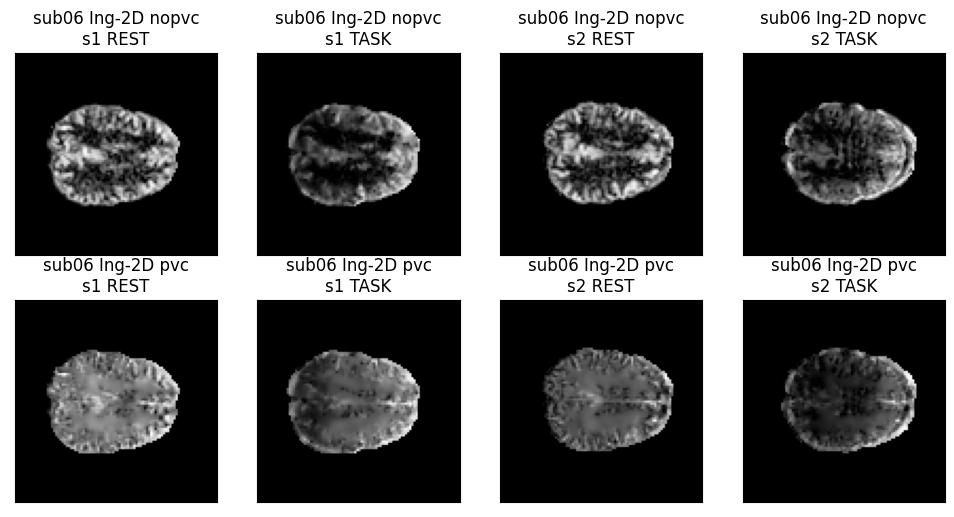

<Figure size 1200x300 with 0 Axes>

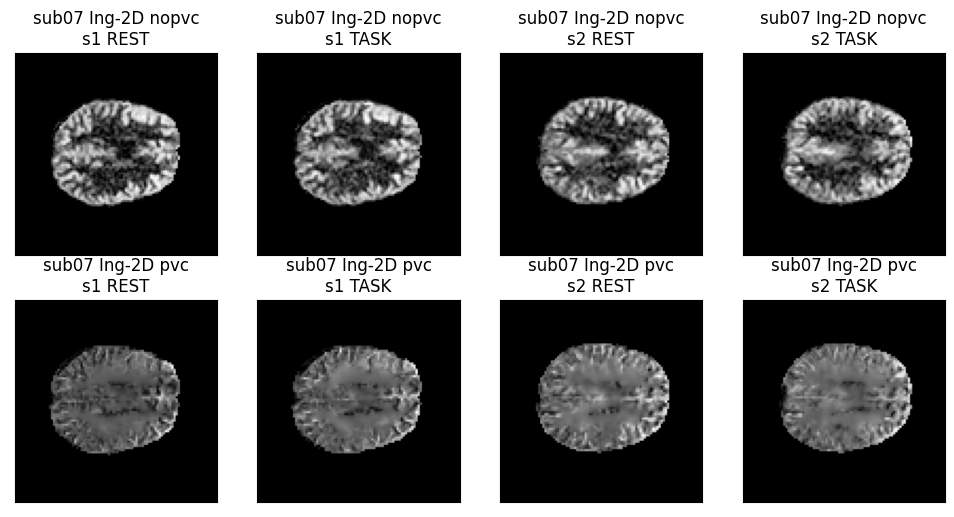

<Figure size 1200x300 with 0 Axes>

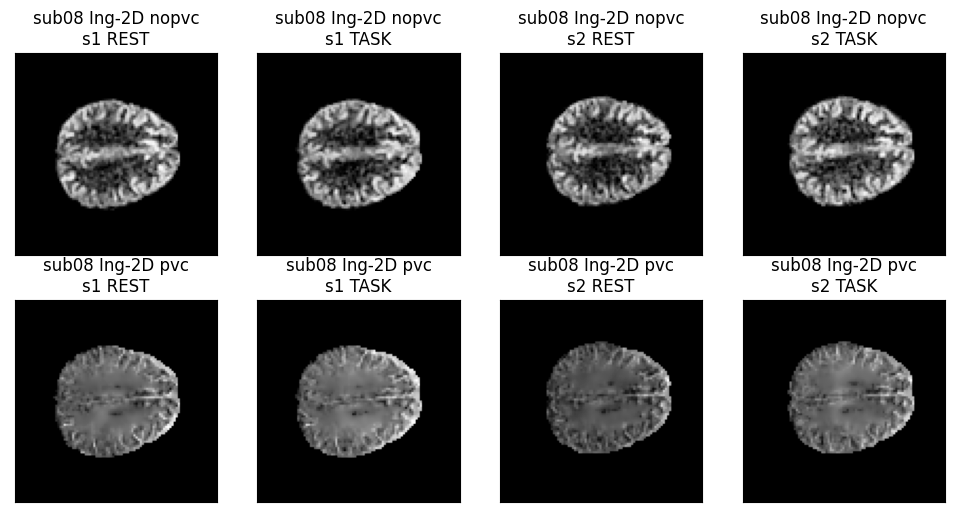

<Figure size 1200x300 with 0 Axes>

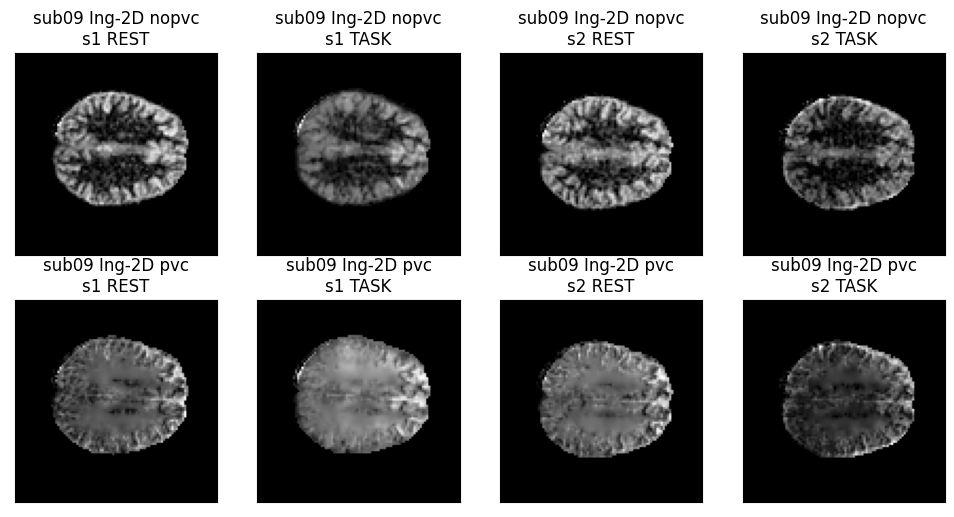

<Figure size 1200x300 with 0 Axes>

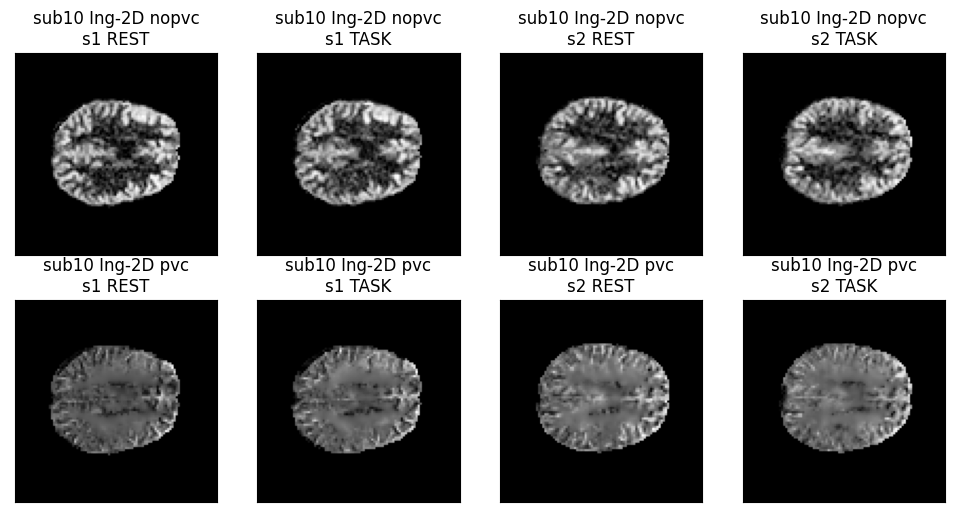

<Figure size 1200x300 with 0 Axes>

In [12]:
visualise_byprotocol(subno=[1,2,3,4,5,6,7,8,9,10],protocol='Ing-2D',space='native',hist=False)